# Project Sample

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from math import pi
from spatialmath import *
from spatialmath.base import *

In [2]:
puma = rtb.models.DH.Puma560()

puma.addconfiguration('q1',[0,0,0,0,0,0])
puma.addconfiguration('q2',[0,pi/2,2,pi/2,0,pi/2])

trj1 = rtb.jtraj(puma.q1, puma.q2, 50)

<IPython.core.display.Javascript object>


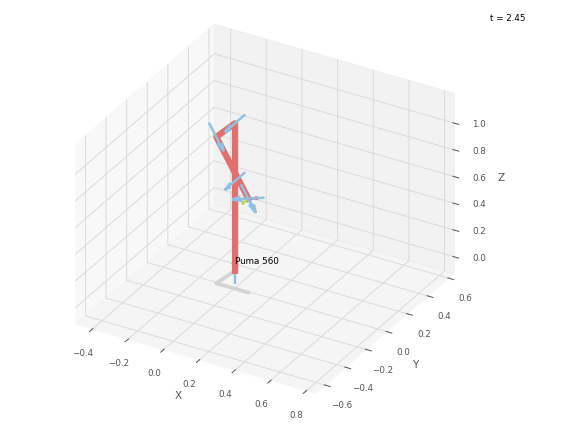

PyPlot3D backend, t = 2.499999999999999, scene:
  Puma 560

In [3]:
puma.plot(trj1.q)

<IPython.core.display.Javascript object>


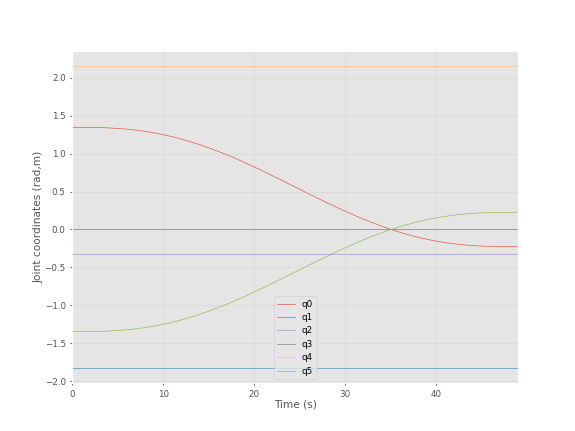

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [105]:
rtb.tools.trajectory.qplot(trj1.q, block = True)

# Project

## Analysis of trapezoidal and polynomial curves

In [156]:
steps = 100
max_val = 10
min_val = 0

step = (max_val - min_val)/steps

tp = rtb.lspb(min_val, max_val, steps)
pol = rtb.tpoly(min_val, max_val, steps)
step_series = np.arange(min_val, steps, 1)

def graph_curve(title, step_series, pol_curve, tp_curve):
    plt.title(title)
    plt.plot(step_series, pol_curve, label="polinomial")
    plt.plot(step_series, tp_curve, label="traprezoidal")
    plt.legend(framealpha=1, frameon=True)

In [161]:
# Displacement vs time
graph_curve("Displacement vs step", step_series, pol.q, tp.q)

In [158]:
# Velocity vs time
graph_curve("Velocity vs step", step_series, pol.qd, tp.qd)

In [159]:
# Acceleration vs time
graph_curve("Acceleration vs step", step_series, pol.qdd, tp.qdd)

In [25]:
def get_SE3_matrix(coordinates):
    return SE3(coordinates["x"], coordinates["y"], coordinates["z"])

In [41]:
A_coord = {"x": 0.2, "y": 0.2, "z": 0}
B_coord = {"x": 0.2, "y": -0.2, "z": 0}
C_coord = {"x": 0.4, "y": -0.2, "z": 0}
D_coord = {"x": 0.4, "y": 0.2, "z": 0}

kin_a = puma.ikine_min(get_SE3_matrix(A_coord))
kin_b = puma.ikine_min(get_SE3_matrix(B_coord))
kin_c = puma.ikine_min(get_SE3_matrix(C_coord))
kin_d = puma.ikine_min(get_SE3_matrix(D_coord))

trj1 = rtb.jtraj(kin_a.q,kin_b.q, 50)
trj2 = rtb.jtraj(kin_b.q,kin_c.q, 50)
trj3 = rtb.jtraj(kin_c.q,kin_d.q, 50)
trj4 = rtb.jtraj(kin_d.q,kin_a.q, 50)

<IPython.core.display.Javascript object>


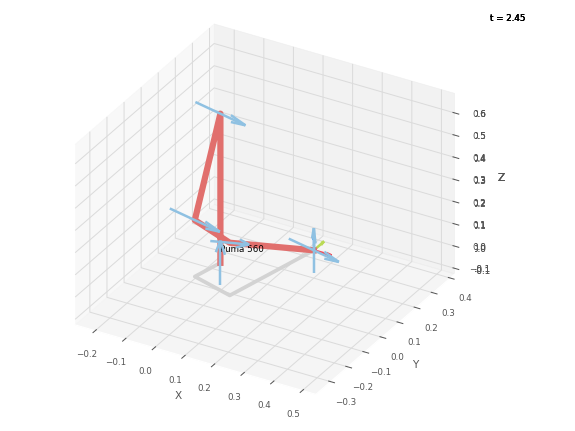

PyPlot3D backend, t = 2.499999999999999, scene:
  Puma 560

In [42]:
puma.plot(trj1.q)
puma.plot(trj2.q)
puma.plot(trj3.q)
puma.plot(trj4.q)

<IPython.core.display.Javascript object>


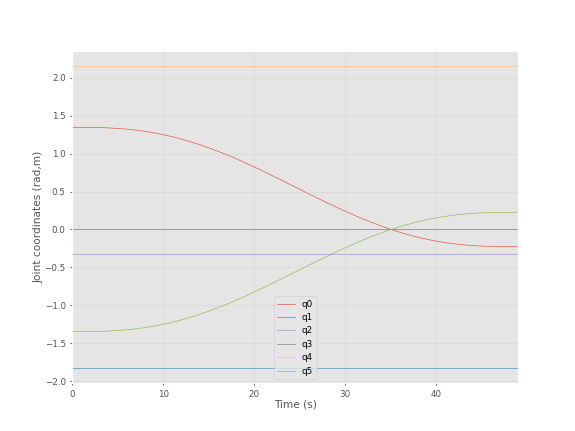

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [63]:
rtb.qplot(trj1.q)